# [reference](https://www.kaggle.com/maskrap97/easy-to-follow-eda-and-machine-learning-python) 
* using data from  [ House Prices - Advanced Regression Techniques ](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## 라이브러리 및 데이터 로드

In [340]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

plt.rc('font', family = 'Malgun Gothic')
plt.style.use('seaborn') 
sns.set(font_scale=1)  
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_og = train.copy()
test_og = test.copy()

display(train.head(), train.shape, test.head(), test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

* **train과 test의 데이터 수가 거의 비슷. 80개의 독립변수와 1개의 종속변수로 구성**

## Null Data 탐색
* **null의 비중이 지나치게 높다면 -> 버림**
* **null이 조금만 있다면 -> 평균 또는 중앙값으로 채움**

In [7]:
# train, test 한꺼번에 처리하기 위해 합침 

data = pd.concat([train, test], keys = ('x', 'y'))
data = data.drop('Id', axis = 1)

data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
x 0             60       RL         65.0     8450   Pave   NaN      Reg   
  1             20       RL         80.0     9600   Pave   NaN      Reg   
  2             60       RL         68.0    11250   Pave   NaN      IR1   
  3             70       RL         60.0     9550   Pave   NaN      IR1   
  4             60       RL         84.0    14260   Pave   NaN      IR1   
...            ...      ...          ...      ...    ...   ...      ...   
y 1454         160       RM         21.0     1936   Pave   NaN      Reg   
  1455         160       RM         21.0     1894   Pave   NaN      Reg   
  1456          20       RL        160.0    20000   Pave   NaN      Reg   
  1457          85       RL         62.0    10441   Pave   NaN      Reg   
  1458          60       RL         74.0     9627   Pave   NaN      Reg   

       LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
x 0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
  2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
  3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
  4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...            ...       ...       ...       ...          ...        ...   
y 1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
  1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
  1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

       Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
x 0          Norm     1Fam     2Story            7            5       2003   
  1          Norm     1Fam     1Story            6            8       1976   
  2          Norm     1Fam     2Story            7            5       2001   
  3          Norm     1Fam     2Story            7            5       1915   
  4          Norm     1Fam     2Story            8            5       2000   
...           ...      ...        ...          ...          ...        ...   
y 1454       Norm    Twnhs     2Story            4            7       1970   
  1455       Norm   TwnhsE     2Story            4            5       1970   
  1456       Norm     1Fam     1Story            5            7       1960   
  1457       Norm     1Fam     SFoyer            5            5       1992   
  1458       Norm     1Fam     2Story            7            5       1993   

        YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
x 0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  1             1976     Gable  CompShg     MetalSd     MetalSd       None   
  2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
  3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
  4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...              ...       ...      ...         ...         ...        ...   
y 1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
  1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
  1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
  1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

        MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
x 0          196.0        Gd        TA      PConc       Gd       TA   
  1            0.0        TA        TA     CBlock       Gd       TA   
  2          162.0        Gd        TA      PConc       Gd       TA   
  3            0.0        TA        

### 변수별 null data 비중

In [15]:
# 각 feature별 null data 비중을 구함. SalePrice는 무시할 것.

null_data = data.isnull().sum().sort_values(ascending = False)
null_percentage = (data.isnull().sum() / data.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([null_data, null_percentage], axis = 1, keys = ['Total', 'Percentage'])

missing_data.head(20)

,Total,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


* **null data가 10% 이상 차지하는 컬럼 삭제(SalePrice는 무시)**

In [16]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace = True)
data.shape  

(2919, 74)

* **위에서 Id를 미리 삭제했고, 여기서 총 80개 중 6개를 삭제했으니 종속변수 포함 74개가 남음**

### Null data 채우기

In [22]:
# numeric 과 categorical 구분하기

num_data = data._get_numeric_data().columns
cat_data = set(data.columns) - set(num_data)

In [35]:
# numeric은 평균으로, categorical은 최빈값으로 채우기

for col in num_data:
    data[col].fillna(data[col].mean(), inplace = True)
    
for col in cat_data:
    data[col].fillna(data[col].mode()[0], inplace = True)

In [36]:
# checking the result if all nulls have been filled.

display(data[num_data].isnull().sum(), data[cat_data].isnull().sum())

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

PavedDrive       0
GarageCond       0
ExterCond        0
Foundation       0
Neighborhood     0
BsmtQual         0
SaleCondition    0
MasVnrType       0
Exterior1st      0
BsmtExposure     0
Street           0
Electrical       0
LotConfig        0
LandSlope        0
LotShape         0
BsmtFinType1     0
BldgType         0
Functional       0
KitchenQual      0
LandContour      0
Heating          0
Utilities        0
Condition1       0
BsmtCond         0
ExterQual        0
HouseStyle       0
GarageQual       0
RoofStyle        0
HeatingQC        0
GarageFinish     0
GarageType       0
MSZoning         0
Condition2       0
CentralAir       0
BsmtFinType2     0
SaleType         0
Exterior2nd      0
RoofMatl         0
dtype: int64

## Categorical Variable 정리
* 어느 한 클래스에 비중이 지나치게 높다면 삭제(여기서는 cut off = 80%)
* 개선사항: 커널에서는 개별 feature의 클래스 value_counts()를 보고 일일이 계산해서 제거할 feature를 선택하였으나, 아래와 같이 개선함 
    * 커널보다 3개의 feature를 추가로 제거함

In [62]:
cut_off = 0.8 
drop_col = []

for i in cat_data:
    if data[i].value_counts(normalize = True)[0] >= cut_off:
        drop_col += [i]
        
drop_col

['PavedDrive',
 'GarageCond',
 'ExterCond',
 'SaleCondition',
 'Street',
 'Electrical',
 'LandSlope',
 'BldgType',
 'Functional',
 'LandContour',
 'Heating',
 'Utilities',
 'Condition1',
 'BsmtCond',
 'GarageQual',
 'Condition2',
 'CentralAir',
 'BsmtFinType2',
 'SaleType',
 'RoofMatl']

In [66]:
data.drop(drop_col, axis = 1, inplace = True)
print(data.shape)

(2919, 54)


* **74개 중 categorical 20개 추가 제거하여 54개 변수가 남음**

## 종속변수의 정규성 확인

* **skewness 0, kurtosis 0이면 완전한 정규분포로 봄**
    * 특이사항: pandas의 kurtosis함수는 Fisher의 정의를 따르므로 정규분포의 kurtosis를 0으로 가정함([doc](https://pandas.pydata.org/docs/reference/api/pandas.Series.kurt.html))
    * 만약 Pearson의 정의(첨도 = 3 이 정규분포)를 기준으로 하려면 아래와 같이 수행
```python
from scipy.stats import kurtosis
kurtosis(data, fisher = False)
```

In [80]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* **평균 > 중앙값 이므로 왜도가 (+)인 Right-skewed일 것으로 예상**

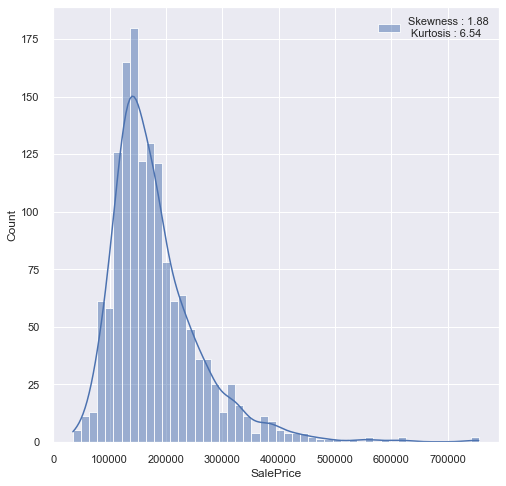

In [79]:
plt.figure(figsize = (8, 8))

sns.histplot(data = train, x = 'SalePrice', bins = 50, kde = True, 
            label='Skewness : {:.2f}\n Kurtosis : {:.2f}'.format(train['SalePrice'].skew(), train['SalePrice'].kurt())).legend()
plt.show()

* **왜도가 1 이상이며 첨도도 높기 때문에 outlier가 있다는 점을 알 수 있다.**

### 종속변수에 로그 취하기

* **SalePrice가 0인 것은 없기 때문에 그냥 np.log만 해도 무방하나, 습관을 들이기 위해 그냥 커널과 동일하게 np.log1p로 수행함**

[참고 블로그](https://steadiness-193.tistory.com/224)

* **np.log1p로 수행한 것은 추후 지수변환하여 되돌릴 때 np.expm1로 하면 됨**
    * np.log1p: 여기서 p는 plus. 0에 로그변환 시 에러나는 것을 방지하기 위해 값에 1을 더한 뒤 로그변환한 것 
    * np.expm1: 여기서 m은 minus. 1을 더하고 로그를 취했으므로, 지수변환 후 1을 다시 빼주는 것 

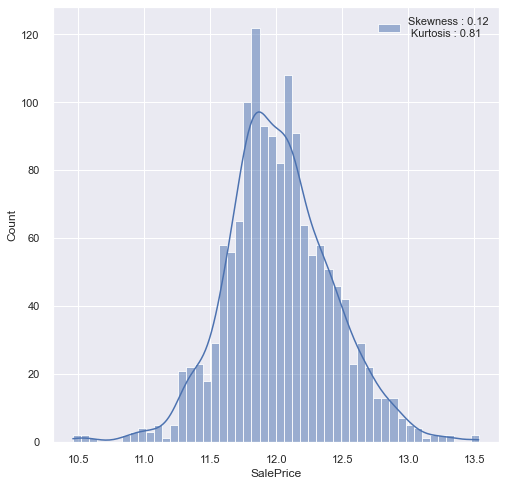

In [81]:
train['SalePrice'] = np.log1p(train['SalePrice'])
data['SalePrice'] = np.log1p(data['SalePrice'])

plt.figure(figsize = (8, 8))
sns.histplot(data = train, x = 'SalePrice', bins = 50, kde = True, 
            label='Skewness : {:.2f}\n Kurtosis : {:.2f}'.format(train['SalePrice'].skew(), train['SalePrice'].kurt())).legend()
plt.show()

## 상관관계 분석

### 상관관계 낮은 feature 제거
* **종속변수인 SalePrice와 상관관계가 지나치게 낮은(+/- 에 관계없이) feature 찾아 제거하기**

In [86]:
corr = train.corr()
corr_rank = corr['SalePrice'].sort_values(ascending = False)

corr_rank.to_frame()

,SalePrice
SalePrice,1.000000
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


* **절대값 0.1 이하인 feature들 전부 삭제하기**
* **개선사항: 커널에서는 일일이 찾아 나열하며 제거하였으나, 아래와 같이 개선함**

In [102]:
corr_rank_idx = list(corr_rank.index)  # 이거 없이 그냥 corr_rank.index 로 해도 된다.
cut_off = 0.1 
drop_col = []

for i in corr_rank_idx:
    if abs(corr_rank[i]) <= cut_off:
        drop_col += [i]
        
drop_col

['PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'Id',
 'MiscVal',
 'OverallCond',
 'YrSold',
 'LowQualFinSF',
 'MSSubClass']

In [103]:
# data 객체 내에는 Id가 없으므로 drop_col에서도 Id는 제거
drop_col.remove('Id')

In [105]:
data.drop(drop_col, axis = 1, inplace = True)
print(data.shape)

(2919, 44)


* **직전 변수 54개에서 44개로 줄어듬**

### 상관관계 높은 feature 선별하여 히트맵
* 개선사항: 기존 커널 대비 깔끔하게 표현

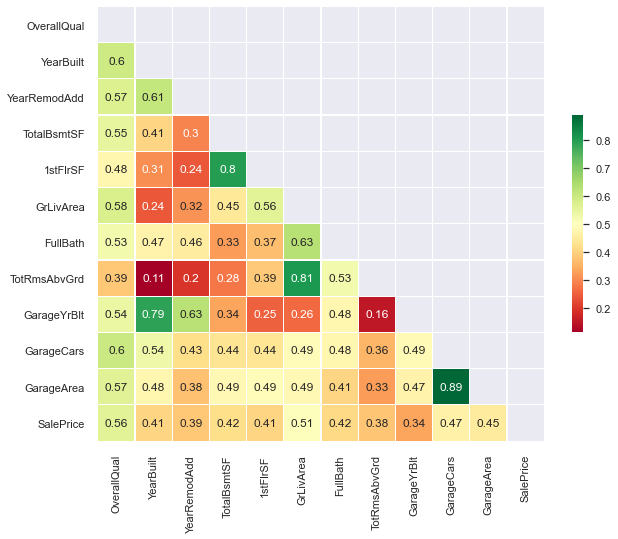

In [124]:
top_features = corr[abs(corr['SalePrice']) >= 0.5].index
top_corr = data[top_features].corr()

plt.figure(figsize = (10, 8))

mask = np.zeros_like(top_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

heat_map = sns.heatmap(top_corr,
                       annot = True, 
                       cmap = 'RdYlGn',
                       mask = mask,
                      linewidths = 0.1,
                      cbar_kws={'shrink' : .5}
                      )

* **SalePrice와의 상관관계**
    * 0.5 이상: OverallQual, GrLivArea
    * 뒤이어 GarageArea, GarageCars, TotalBsmtSF, 1stFlrSF 도 높음
    * living area와 관련된 feature들이 SalePrice에 큰 영향을 미침을 알 수 있음

### 상관관계 상위 12개만 선별, scatter plot 그리기

In [131]:
# corr_rank에서 SalePrice를 drop(아래 셀의 for문을 이용해 상관관계를 나타낼 때 SalePrice는 불필요하므로)
# 이후 남은 index들을 리스트로 담음

corr_rank.drop(['SalePrice'], inplace = True)
sorted_corr = list(corr_rank.index)

* **zip을 통해 여러 plot을 for문으로 나타내기(동일한 y 사용 조건)**

```python
fig, axes = plt.subplots(4, 3, figsize=(20,15), sharey= True)

for i, j in zip(range(subplot의 갯수, iterable 객체):
    sns.플롯명(y = df['타겟변수명'], x = df[j], ax = axes[i // 열 갯수][i % 열 갯수]
    axes[i // 열 갯수][i % 열 갯수].set_title('반복하고자 하는 str' + j)
```

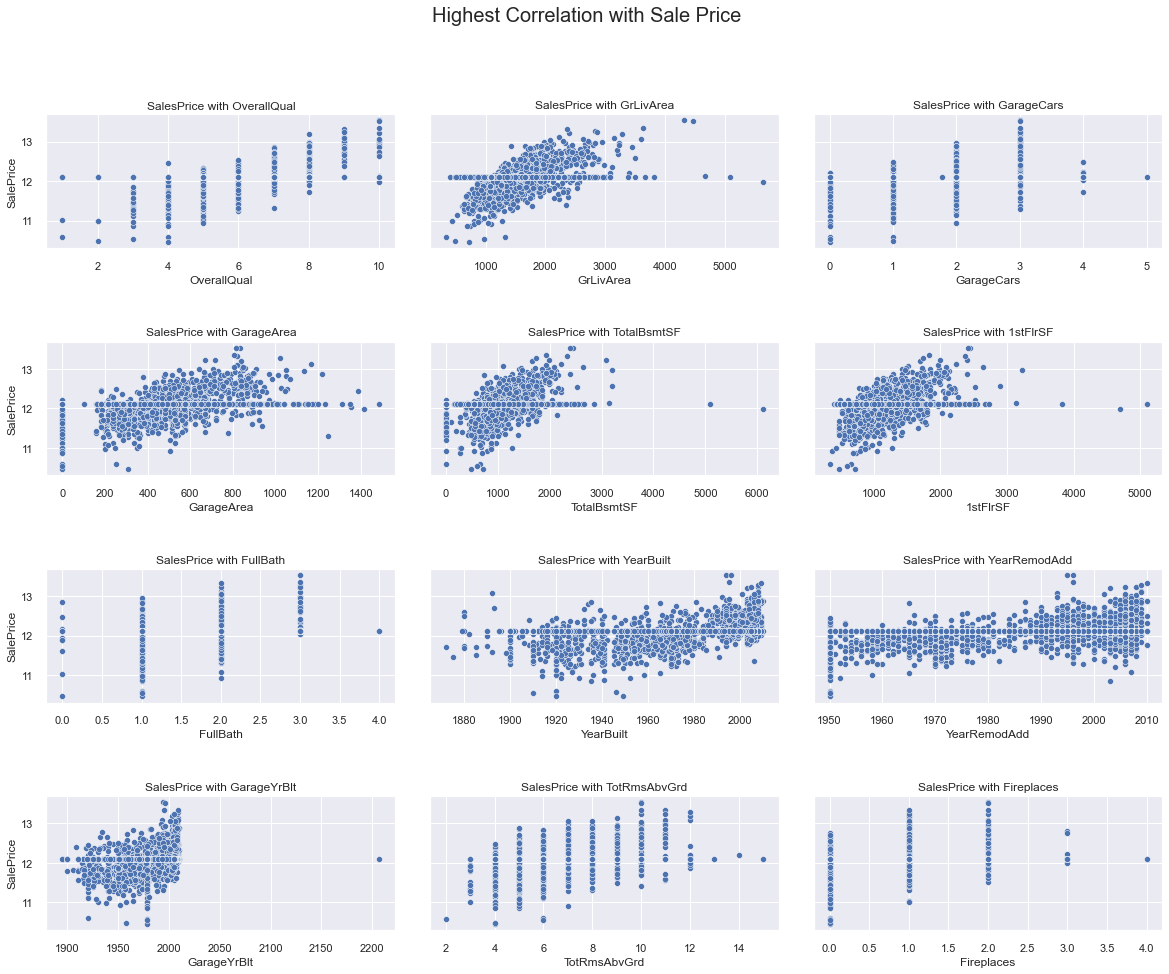

In [138]:
fig, axes = plt.subplots(4, 3, figsize=(20,15), sharey= True)  # sharey = True 모든 서브플롯이 동일한 y축을 가짐

# 또는 위의 subplots()에서 constrained_layout = True 를 활성화 하여 axes간 간격을 최적화할 수 있다. 
# 여기서는 그냥 아래와 같이 plt.subplots_adjust를 이용해서 더 넓직하게 설정함.

fig.suptitle("Highest Correlation with Sale Price", fontsize= 20) # suptitle: 모든 서브플롯을 대표하는 하나의 메인 타이틀
plt.subplots_adjust(hspace = 0.7, wspace=0.1)

for i,col in zip(range(12), sorted_corr):
    sns.scatterplot(y = data['SalePrice'], x = data[col], ax = axes[i//3][i%3])
    axes[i//3][i%3].set_title('SalesPrice with '+col)

* **OverallQaul과 기타 Area, SquareFootage관련 feature들의 양의 상관관계가 두드러짐**
* **몇몇 feature에서 outlier가 있음을 알 수 있음**

## Outliers 처리

In [169]:
# 눈에 보인 게 있어서 그냥 바로 수정함.
data.loc[data['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007

In [177]:
# select_dtypes()를 이용하여 object를 제외한 나머지 numerical 변수들의 컬럼 검색

n_features = data.select_dtypes(exclude = ['object']).columns
n_features

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [178]:
# Area, Square Footage 관련 feature만 선별하여 저장

data_outliers = data[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                      '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [179]:
# 아웃라이어 선별하고,
# 그 아웃라이어 값이 lower_bound이보다 작다면 lower_bound값으로 통일하고,
# 그 아웃라이어 값이 upper_bound이보다 크다면 upper_bound값으로 통일하기

def mod_outliers(data):
    df1 = data.copy()
    data = data[["LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF",
                "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF",
                "OpenPorchSF"]]
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    for col in data.columns:
        for i in range(0, len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
                
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
                
    for col in data.columns:
        df1[col] = data[col]
        
    return(df1)

In [180]:
data_outliers = mod_outliers(data_outliers)

data = mod_outliers(data)

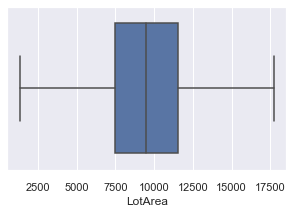

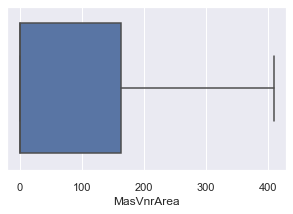

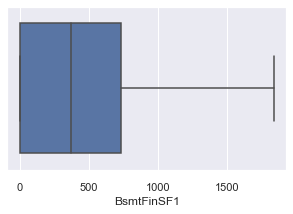

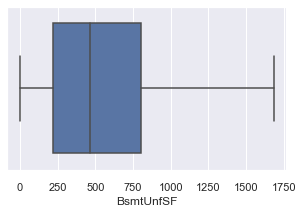

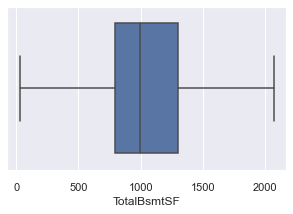

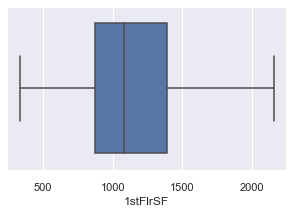

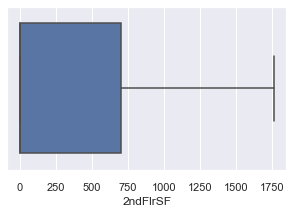

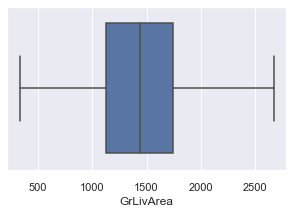

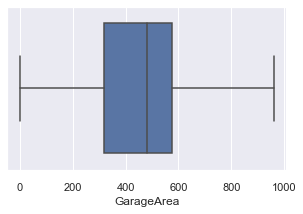

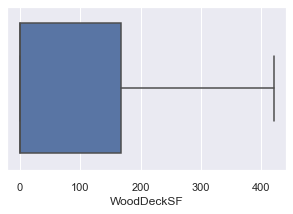

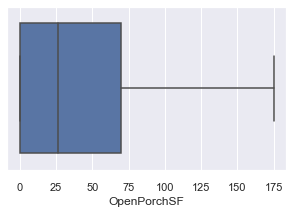

In [188]:
# box plot을 통해, 해당 feature들에 아웃라이어들이 없어졌는지 재확인

for i in data_outliers:
    plt.figure(figsize = (5,3))
    sns.boxplot(x=data_outliers[i])
    plt.show()

## 모델링 준비 
### one hot encoding 및 train, test 재 분리

In [189]:
data.shape

(2919, 44)

In [191]:
# one_hot encoding을 통해 categorical 더미변수 생성

data = pd.get_dummies(data)

print(data.shape)

(2919, 156)


* **categorical 변수에 대한 one-hot encoding을 통해 feature가 156개(종속변수 포함)로 늘어남**

In [195]:
# train, test 재 분리

train = data.loc['x']
test = data.loc['y']
test.drop(['SalePrice'], axis = 1, inplace = True)

y = train['SalePrice']
train_x = train.drop(['SalePrice'], axis = 1)
test_x = test

display(train_x.shape, test_x.shape, y.shape)

(1460, 155)

(1459, 155)

(1460,)

## 모델 적용 및 제출

In [198]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train_x, y,
                                    scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

In [214]:
lasso = LassoCV(alphas = [1, 0.1, 0.01, 0.001, 0.0001], random_state = 1618).fit(train_x, y)
rmse_cv(lasso).mean()

0.13369248558315514

In [212]:
model_xgb = XGBRegressor(n_estimators = 360, max_depth = 2, learning_rate = 0.1, random_state = 1618)
model_xgb.fit(train_x, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=8, num_parallel_tree=1, random_state=1618,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [213]:
rmse_cv(model_xgb).mean()

0.13170157928059825

In [219]:
model_cat = CatBoostRegressor(random_state = 1618)
model_cat.fit(train_x, y)

Learning rate set to 0.04175
0:	learn: 0.3887858	total: 167ms	remaining: 2m 46s
1:	learn: 0.3785318	total: 169ms	remaining: 1m 24s
2:	learn: 0.3686067	total: 172ms	remaining: 57.2s
3:	learn: 0.3582845	total: 175ms	remaining: 43.5s
4:	learn: 0.3487839	total: 177ms	remaining: 35.3s
5:	learn: 0.3405753	total: 180ms	remaining: 29.8s
6:	learn: 0.3320969	total: 182ms	remaining: 25.8s
7:	learn: 0.3242442	total: 184ms	remaining: 22.8s
8:	learn: 0.3163235	total: 186ms	remaining: 20.5s
9:	learn: 0.3085228	total: 189ms	remaining: 18.7s
10:	learn: 0.3011332	total: 191ms	remaining: 17.2s
11:	learn: 0.2947161	total: 194ms	remaining: 15.9s
12:	learn: 0.2884783	total: 196ms	remaining: 14.9s
13:	learn: 0.2818649	total: 199ms	remaining: 14s
14:	learn: 0.2759518	total: 202ms	remaining: 13.3s
15:	learn: 0.2705032	total: 205ms	remaining: 12.6s
16:	learn: 0.2647878	total: 208ms	remaining: 12s
17:	learn: 0.2595874	total: 210ms	remaining: 11.5s
18:	learn: 0.2545167	total: 212ms	remaining: 11s
19:	learn: 0.249

232:	learn: 0.0974640	total: 692ms	remaining: 2.28s
233:	learn: 0.0972917	total: 695ms	remaining: 2.27s
234:	learn: 0.0970746	total: 698ms	remaining: 2.27s
235:	learn: 0.0969406	total: 700ms	remaining: 2.27s
236:	learn: 0.0968184	total: 702ms	remaining: 2.26s
237:	learn: 0.0966473	total: 705ms	remaining: 2.26s
238:	learn: 0.0964414	total: 708ms	remaining: 2.25s
239:	learn: 0.0962995	total: 710ms	remaining: 2.25s
240:	learn: 0.0961704	total: 712ms	remaining: 2.24s
241:	learn: 0.0960451	total: 714ms	remaining: 2.24s
242:	learn: 0.0960134	total: 717ms	remaining: 2.23s
243:	learn: 0.0957886	total: 719ms	remaining: 2.23s
244:	learn: 0.0956606	total: 721ms	remaining: 2.22s
245:	learn: 0.0954951	total: 723ms	remaining: 2.22s
246:	learn: 0.0953375	total: 726ms	remaining: 2.21s
247:	learn: 0.0952742	total: 728ms	remaining: 2.21s
248:	learn: 0.0952094	total: 730ms	remaining: 2.2s
249:	learn: 0.0950601	total: 732ms	remaining: 2.2s
250:	learn: 0.0950073	total: 734ms	remaining: 2.19s
251:	learn: 0.

445:	learn: 0.0752596	total: 1.22s	remaining: 1.51s
446:	learn: 0.0752107	total: 1.22s	remaining: 1.51s
447:	learn: 0.0751173	total: 1.22s	remaining: 1.5s
448:	learn: 0.0750098	total: 1.22s	remaining: 1.5s
449:	learn: 0.0749044	total: 1.23s	remaining: 1.5s
450:	learn: 0.0747710	total: 1.23s	remaining: 1.5s
451:	learn: 0.0747051	total: 1.23s	remaining: 1.49s
452:	learn: 0.0746716	total: 1.23s	remaining: 1.49s
453:	learn: 0.0745905	total: 1.24s	remaining: 1.49s
454:	learn: 0.0745187	total: 1.24s	remaining: 1.48s
455:	learn: 0.0744110	total: 1.24s	remaining: 1.48s
456:	learn: 0.0743769	total: 1.24s	remaining: 1.48s
457:	learn: 0.0743178	total: 1.24s	remaining: 1.47s
458:	learn: 0.0742200	total: 1.25s	remaining: 1.47s
459:	learn: 0.0741919	total: 1.25s	remaining: 1.47s
460:	learn: 0.0741209	total: 1.25s	remaining: 1.46s
461:	learn: 0.0741080	total: 1.25s	remaining: 1.46s
462:	learn: 0.0740198	total: 1.25s	remaining: 1.46s
463:	learn: 0.0739843	total: 1.26s	remaining: 1.45s
464:	learn: 0.07

681:	learn: 0.0589699	total: 1.75s	remaining: 816ms
682:	learn: 0.0589513	total: 1.75s	remaining: 813ms
683:	learn: 0.0588919	total: 1.75s	remaining: 810ms
684:	learn: 0.0588805	total: 1.76s	remaining: 808ms
685:	learn: 0.0588444	total: 1.76s	remaining: 805ms
686:	learn: 0.0588324	total: 1.76s	remaining: 803ms
687:	learn: 0.0587606	total: 1.76s	remaining: 800ms
688:	learn: 0.0586948	total: 1.77s	remaining: 797ms
689:	learn: 0.0586362	total: 1.77s	remaining: 795ms
690:	learn: 0.0585849	total: 1.77s	remaining: 792ms
691:	learn: 0.0585202	total: 1.77s	remaining: 789ms
692:	learn: 0.0584865	total: 1.77s	remaining: 787ms
693:	learn: 0.0584203	total: 1.78s	remaining: 784ms
694:	learn: 0.0584069	total: 1.78s	remaining: 781ms
695:	learn: 0.0583450	total: 1.78s	remaining: 778ms
696:	learn: 0.0582776	total: 1.78s	remaining: 776ms
697:	learn: 0.0582110	total: 1.79s	remaining: 773ms
698:	learn: 0.0581603	total: 1.79s	remaining: 770ms
699:	learn: 0.0580808	total: 1.79s	remaining: 768ms
700:	learn: 

893:	learn: 0.0481050	total: 2.27s	remaining: 269ms
894:	learn: 0.0480668	total: 2.27s	remaining: 267ms
895:	learn: 0.0480558	total: 2.27s	remaining: 264ms
896:	learn: 0.0480060	total: 2.28s	remaining: 261ms
897:	learn: 0.0479797	total: 2.28s	remaining: 259ms
898:	learn: 0.0479461	total: 2.28s	remaining: 256ms
899:	learn: 0.0478849	total: 2.28s	remaining: 254ms
900:	learn: 0.0478251	total: 2.29s	remaining: 251ms
901:	learn: 0.0477628	total: 2.29s	remaining: 249ms
902:	learn: 0.0477039	total: 2.29s	remaining: 246ms
903:	learn: 0.0476804	total: 2.29s	remaining: 243ms
904:	learn: 0.0476351	total: 2.29s	remaining: 241ms
905:	learn: 0.0476258	total: 2.3s	remaining: 238ms
906:	learn: 0.0476097	total: 2.3s	remaining: 236ms
907:	learn: 0.0475752	total: 2.3s	remaining: 233ms
908:	learn: 0.0475221	total: 2.3s	remaining: 231ms
909:	learn: 0.0474871	total: 2.31s	remaining: 228ms
910:	learn: 0.0474500	total: 2.31s	remaining: 225ms
911:	learn: 0.0473836	total: 2.31s	remaining: 223ms
912:	learn: 0.04

In [220]:
rmse_cv(model_cat).mean()

Learning rate set to 0.040124
0:	learn: 0.3927878	total: 15.9ms	remaining: 15.9s
1:	learn: 0.3826381	total: 18.3ms	remaining: 9.14s
2:	learn: 0.3730726	total: 20.6ms	remaining: 6.85s
3:	learn: 0.3634038	total: 22.9ms	remaining: 5.71s
4:	learn: 0.3549347	total: 25ms	remaining: 4.98s
5:	learn: 0.3469117	total: 27.1ms	remaining: 4.5s
6:	learn: 0.3385914	total: 29.4ms	remaining: 4.18s
7:	learn: 0.3305861	total: 31.6ms	remaining: 3.92s
8:	learn: 0.3234731	total: 33.6ms	remaining: 3.7s
9:	learn: 0.3158149	total: 35.8ms	remaining: 3.54s
10:	learn: 0.3092107	total: 37.7ms	remaining: 3.39s
11:	learn: 0.3022499	total: 40ms	remaining: 3.29s
12:	learn: 0.2957382	total: 42ms	remaining: 3.19s
13:	learn: 0.2894518	total: 44.3ms	remaining: 3.12s
14:	learn: 0.2834935	total: 46.3ms	remaining: 3.04s
15:	learn: 0.2779923	total: 48.7ms	remaining: 2.99s
16:	learn: 0.2721857	total: 50.8ms	remaining: 2.94s
17:	learn: 0.2667880	total: 52.9ms	remaining: 2.89s
18:	learn: 0.2614022	total: 54.9ms	remaining: 2.84s


226:	learn: 0.1005722	total: 519ms	remaining: 1.77s
227:	learn: 0.1003674	total: 521ms	remaining: 1.76s
228:	learn: 0.1002109	total: 524ms	remaining: 1.76s
229:	learn: 0.1000112	total: 526ms	remaining: 1.76s
230:	learn: 0.0997650	total: 529ms	remaining: 1.76s
231:	learn: 0.0995702	total: 531ms	remaining: 1.76s
232:	learn: 0.0994623	total: 533ms	remaining: 1.75s
233:	learn: 0.0992513	total: 535ms	remaining: 1.75s
234:	learn: 0.0990235	total: 538ms	remaining: 1.75s
235:	learn: 0.0988326	total: 540ms	remaining: 1.75s
236:	learn: 0.0987369	total: 542ms	remaining: 1.74s
237:	learn: 0.0985621	total: 544ms	remaining: 1.74s
238:	learn: 0.0984624	total: 546ms	remaining: 1.74s
239:	learn: 0.0982946	total: 548ms	remaining: 1.74s
240:	learn: 0.0980613	total: 550ms	remaining: 1.73s
241:	learn: 0.0979227	total: 552ms	remaining: 1.73s
242:	learn: 0.0977719	total: 554ms	remaining: 1.73s
243:	learn: 0.0976158	total: 556ms	remaining: 1.72s
244:	learn: 0.0974313	total: 559ms	remaining: 1.72s
245:	learn: 

392:	learn: 0.0788068	total: 873ms	remaining: 1.35s
393:	learn: 0.0787701	total: 875ms	remaining: 1.34s
394:	learn: 0.0786947	total: 877ms	remaining: 1.34s
395:	learn: 0.0785979	total: 879ms	remaining: 1.34s
396:	learn: 0.0785752	total: 882ms	remaining: 1.34s
397:	learn: 0.0783962	total: 884ms	remaining: 1.34s
398:	learn: 0.0782751	total: 886ms	remaining: 1.33s
399:	learn: 0.0782526	total: 888ms	remaining: 1.33s
400:	learn: 0.0780788	total: 890ms	remaining: 1.33s
401:	learn: 0.0780267	total: 892ms	remaining: 1.33s
402:	learn: 0.0779121	total: 894ms	remaining: 1.32s
403:	learn: 0.0777960	total: 896ms	remaining: 1.32s
404:	learn: 0.0776619	total: 898ms	remaining: 1.32s
405:	learn: 0.0775288	total: 900ms	remaining: 1.32s
406:	learn: 0.0774007	total: 902ms	remaining: 1.31s
407:	learn: 0.0773004	total: 904ms	remaining: 1.31s
408:	learn: 0.0772265	total: 906ms	remaining: 1.31s
409:	learn: 0.0770915	total: 908ms	remaining: 1.31s
410:	learn: 0.0770436	total: 910ms	remaining: 1.3s
411:	learn: 0

629:	learn: 0.0603101	total: 1.4s	remaining: 823ms
630:	learn: 0.0602396	total: 1.4s	remaining: 821ms
631:	learn: 0.0601908	total: 1.41s	remaining: 818ms
632:	learn: 0.0601442	total: 1.41s	remaining: 816ms
633:	learn: 0.0601335	total: 1.41s	remaining: 814ms
634:	learn: 0.0600522	total: 1.41s	remaining: 812ms
635:	learn: 0.0599996	total: 1.41s	remaining: 810ms
636:	learn: 0.0599919	total: 1.42s	remaining: 808ms
637:	learn: 0.0599440	total: 1.42s	remaining: 805ms
638:	learn: 0.0598661	total: 1.42s	remaining: 803ms
639:	learn: 0.0597763	total: 1.42s	remaining: 801ms
640:	learn: 0.0596800	total: 1.43s	remaining: 799ms
641:	learn: 0.0596028	total: 1.43s	remaining: 797ms
642:	learn: 0.0595197	total: 1.43s	remaining: 795ms
643:	learn: 0.0594810	total: 1.43s	remaining: 792ms
644:	learn: 0.0594129	total: 1.44s	remaining: 790ms
645:	learn: 0.0593068	total: 1.44s	remaining: 788ms
646:	learn: 0.0592079	total: 1.44s	remaining: 786ms
647:	learn: 0.0591583	total: 1.44s	remaining: 784ms
648:	learn: 0.

791:	learn: 0.0503966	total: 1.75s	remaining: 460ms
792:	learn: 0.0503247	total: 1.75s	remaining: 458ms
793:	learn: 0.0503060	total: 1.76s	remaining: 456ms
794:	learn: 0.0502303	total: 1.76s	remaining: 454ms
795:	learn: 0.0501660	total: 1.76s	remaining: 452ms
796:	learn: 0.0500811	total: 1.76s	remaining: 449ms
797:	learn: 0.0500005	total: 1.77s	remaining: 447ms
798:	learn: 0.0499520	total: 1.77s	remaining: 445ms
799:	learn: 0.0499197	total: 1.77s	remaining: 443ms
800:	learn: 0.0498477	total: 1.77s	remaining: 441ms
801:	learn: 0.0497827	total: 1.77s	remaining: 438ms
802:	learn: 0.0497704	total: 1.78s	remaining: 436ms
803:	learn: 0.0496703	total: 1.78s	remaining: 434ms
804:	learn: 0.0495980	total: 1.78s	remaining: 432ms
805:	learn: 0.0495291	total: 1.78s	remaining: 429ms
806:	learn: 0.0494532	total: 1.79s	remaining: 427ms
807:	learn: 0.0494153	total: 1.79s	remaining: 425ms
808:	learn: 0.0493323	total: 1.79s	remaining: 423ms
809:	learn: 0.0492365	total: 1.79s	remaining: 421ms
810:	learn: 

951:	learn: 0.0421738	total: 2.1s	remaining: 106ms
952:	learn: 0.0421494	total: 2.11s	remaining: 104ms
953:	learn: 0.0421099	total: 2.11s	remaining: 102ms
954:	learn: 0.0420597	total: 2.11s	remaining: 99.5ms
955:	learn: 0.0420351	total: 2.11s	remaining: 97.3ms
956:	learn: 0.0420281	total: 2.12s	remaining: 95.1ms
957:	learn: 0.0419883	total: 2.12s	remaining: 92.9ms
958:	learn: 0.0419227	total: 2.12s	remaining: 90.7ms
959:	learn: 0.0418475	total: 2.12s	remaining: 88.5ms
960:	learn: 0.0418347	total: 2.13s	remaining: 86.3ms
961:	learn: 0.0417764	total: 2.13s	remaining: 84.1ms
962:	learn: 0.0417333	total: 2.13s	remaining: 81.8ms
963:	learn: 0.0416696	total: 2.13s	remaining: 79.6ms
964:	learn: 0.0416668	total: 2.13s	remaining: 77.4ms
965:	learn: 0.0416109	total: 2.14s	remaining: 75.2ms
966:	learn: 0.0415624	total: 2.14s	remaining: 73ms
967:	learn: 0.0415344	total: 2.14s	remaining: 70.8ms
968:	learn: 0.0414709	total: 2.14s	remaining: 68.6ms
969:	learn: 0.0414338	total: 2.15s	remaining: 66.4ms

162:	learn: 0.1048279	total: 359ms	remaining: 1.84s
163:	learn: 0.1046593	total: 361ms	remaining: 1.84s
164:	learn: 0.1045038	total: 363ms	remaining: 1.84s
165:	learn: 0.1043166	total: 366ms	remaining: 1.84s
166:	learn: 0.1040653	total: 368ms	remaining: 1.84s
167:	learn: 0.1038326	total: 371ms	remaining: 1.83s
168:	learn: 0.1036133	total: 373ms	remaining: 1.83s
169:	learn: 0.1034339	total: 375ms	remaining: 1.83s
170:	learn: 0.1032818	total: 377ms	remaining: 1.83s
171:	learn: 0.1031111	total: 379ms	remaining: 1.82s
172:	learn: 0.1029265	total: 381ms	remaining: 1.82s
173:	learn: 0.1027952	total: 383ms	remaining: 1.82s
174:	learn: 0.1025882	total: 386ms	remaining: 1.82s
175:	learn: 0.1024054	total: 388ms	remaining: 1.82s
176:	learn: 0.1022660	total: 390ms	remaining: 1.81s
177:	learn: 0.1020585	total: 392ms	remaining: 1.81s
178:	learn: 0.1018638	total: 394ms	remaining: 1.81s
179:	learn: 0.1016863	total: 396ms	remaining: 1.81s
180:	learn: 0.1015446	total: 399ms	remaining: 1.8s
181:	learn: 0

322:	learn: 0.0830161	total: 711ms	remaining: 1.49s
323:	learn: 0.0829026	total: 713ms	remaining: 1.49s
324:	learn: 0.0828158	total: 716ms	remaining: 1.49s
325:	learn: 0.0827037	total: 718ms	remaining: 1.48s
326:	learn: 0.0826631	total: 720ms	remaining: 1.48s
327:	learn: 0.0825528	total: 723ms	remaining: 1.48s
328:	learn: 0.0825195	total: 725ms	remaining: 1.48s
329:	learn: 0.0824613	total: 728ms	remaining: 1.48s
330:	learn: 0.0823763	total: 730ms	remaining: 1.48s
331:	learn: 0.0822853	total: 733ms	remaining: 1.47s
332:	learn: 0.0822160	total: 735ms	remaining: 1.47s
333:	learn: 0.0822063	total: 737ms	remaining: 1.47s
334:	learn: 0.0821383	total: 739ms	remaining: 1.47s
335:	learn: 0.0820616	total: 741ms	remaining: 1.47s
336:	learn: 0.0820224	total: 744ms	remaining: 1.46s
337:	learn: 0.0819446	total: 746ms	remaining: 1.46s
338:	learn: 0.0817759	total: 748ms	remaining: 1.46s
339:	learn: 0.0816010	total: 750ms	remaining: 1.46s
340:	learn: 0.0815164	total: 752ms	remaining: 1.45s
341:	learn: 

486:	learn: 0.0690438	total: 1.06s	remaining: 1.12s
487:	learn: 0.0690371	total: 1.07s	remaining: 1.12s
488:	learn: 0.0690113	total: 1.07s	remaining: 1.12s
489:	learn: 0.0689108	total: 1.07s	remaining: 1.11s
490:	learn: 0.0688513	total: 1.07s	remaining: 1.11s
491:	learn: 0.0687480	total: 1.08s	remaining: 1.11s
492:	learn: 0.0687386	total: 1.08s	remaining: 1.11s
493:	learn: 0.0686992	total: 1.08s	remaining: 1.11s
494:	learn: 0.0686392	total: 1.08s	remaining: 1.1s
495:	learn: 0.0685358	total: 1.08s	remaining: 1.1s
496:	learn: 0.0684577	total: 1.09s	remaining: 1.1s
497:	learn: 0.0682825	total: 1.09s	remaining: 1.1s
498:	learn: 0.0681661	total: 1.09s	remaining: 1.09s
499:	learn: 0.0680966	total: 1.09s	remaining: 1.09s
500:	learn: 0.0680153	total: 1.09s	remaining: 1.09s
501:	learn: 0.0679505	total: 1.1s	remaining: 1.09s
502:	learn: 0.0678655	total: 1.1s	remaining: 1.09s
503:	learn: 0.0677313	total: 1.1s	remaining: 1.08s
504:	learn: 0.0676547	total: 1.1s	remaining: 1.08s
505:	learn: 0.067630

652:	learn: 0.0568034	total: 1.42s	remaining: 755ms
653:	learn: 0.0567909	total: 1.42s	remaining: 753ms
654:	learn: 0.0566977	total: 1.42s	remaining: 750ms
655:	learn: 0.0566131	total: 1.43s	remaining: 748ms
656:	learn: 0.0565403	total: 1.43s	remaining: 746ms
657:	learn: 0.0564995	total: 1.43s	remaining: 744ms
658:	learn: 0.0564140	total: 1.43s	remaining: 742ms
659:	learn: 0.0563145	total: 1.44s	remaining: 740ms
660:	learn: 0.0563098	total: 1.44s	remaining: 738ms
661:	learn: 0.0562707	total: 1.44s	remaining: 735ms
662:	learn: 0.0561992	total: 1.44s	remaining: 733ms
663:	learn: 0.0561380	total: 1.44s	remaining: 731ms
664:	learn: 0.0560235	total: 1.45s	remaining: 729ms
665:	learn: 0.0559755	total: 1.45s	remaining: 727ms
666:	learn: 0.0559273	total: 1.45s	remaining: 724ms
667:	learn: 0.0558541	total: 1.45s	remaining: 722ms
668:	learn: 0.0557803	total: 1.46s	remaining: 720ms
669:	learn: 0.0556764	total: 1.46s	remaining: 718ms
670:	learn: 0.0556041	total: 1.46s	remaining: 716ms
671:	learn: 

882:	learn: 0.0433203	total: 1.94s	remaining: 257ms
883:	learn: 0.0432651	total: 1.94s	remaining: 255ms
884:	learn: 0.0432186	total: 1.95s	remaining: 253ms
885:	learn: 0.0431950	total: 1.95s	remaining: 251ms
886:	learn: 0.0431613	total: 1.95s	remaining: 248ms
887:	learn: 0.0430843	total: 1.95s	remaining: 246ms
888:	learn: 0.0430491	total: 1.96s	remaining: 244ms
889:	learn: 0.0430039	total: 1.96s	remaining: 242ms
890:	learn: 0.0429630	total: 1.96s	remaining: 240ms
891:	learn: 0.0429410	total: 1.96s	remaining: 238ms
892:	learn: 0.0428913	total: 1.96s	remaining: 235ms
893:	learn: 0.0428641	total: 1.97s	remaining: 233ms
894:	learn: 0.0428190	total: 1.97s	remaining: 231ms
895:	learn: 0.0427821	total: 1.97s	remaining: 229ms
896:	learn: 0.0427180	total: 1.97s	remaining: 226ms
897:	learn: 0.0426562	total: 1.97s	remaining: 224ms
898:	learn: 0.0426186	total: 1.98s	remaining: 222ms
899:	learn: 0.0425832	total: 1.98s	remaining: 220ms
900:	learn: 0.0425112	total: 1.98s	remaining: 218ms
901:	learn: 

97:	learn: 0.1250796	total: 236ms	remaining: 2.17s
98:	learn: 0.1247832	total: 238ms	remaining: 2.17s
99:	learn: 0.1242728	total: 241ms	remaining: 2.17s
100:	learn: 0.1238754	total: 243ms	remaining: 2.17s
101:	learn: 0.1234145	total: 246ms	remaining: 2.16s
102:	learn: 0.1230398	total: 248ms	remaining: 2.16s
103:	learn: 0.1225333	total: 251ms	remaining: 2.16s
104:	learn: 0.1222333	total: 253ms	remaining: 2.16s
105:	learn: 0.1218764	total: 256ms	remaining: 2.16s
106:	learn: 0.1214211	total: 258ms	remaining: 2.15s
107:	learn: 0.1211023	total: 260ms	remaining: 2.15s
108:	learn: 0.1205810	total: 262ms	remaining: 2.15s
109:	learn: 0.1202409	total: 265ms	remaining: 2.14s
110:	learn: 0.1199660	total: 267ms	remaining: 2.13s
111:	learn: 0.1196357	total: 269ms	remaining: 2.13s
112:	learn: 0.1193955	total: 271ms	remaining: 2.13s
113:	learn: 0.1190763	total: 273ms	remaining: 2.12s
114:	learn: 0.1188216	total: 275ms	remaining: 2.12s
115:	learn: 0.1184196	total: 277ms	remaining: 2.11s
116:	learn: 0.1

327:	learn: 0.0834964	total: 759ms	remaining: 1.55s
328:	learn: 0.0833985	total: 762ms	remaining: 1.55s
329:	learn: 0.0832108	total: 764ms	remaining: 1.55s
330:	learn: 0.0830581	total: 766ms	remaining: 1.55s
331:	learn: 0.0830008	total: 768ms	remaining: 1.54s
332:	learn: 0.0827796	total: 771ms	remaining: 1.54s
333:	learn: 0.0826674	total: 773ms	remaining: 1.54s
334:	learn: 0.0826261	total: 775ms	remaining: 1.54s
335:	learn: 0.0826026	total: 778ms	remaining: 1.54s
336:	learn: 0.0824207	total: 780ms	remaining: 1.53s
337:	learn: 0.0823451	total: 783ms	remaining: 1.53s
338:	learn: 0.0821653	total: 785ms	remaining: 1.53s
339:	learn: 0.0820286	total: 788ms	remaining: 1.53s
340:	learn: 0.0818606	total: 790ms	remaining: 1.53s
341:	learn: 0.0817289	total: 792ms	remaining: 1.52s
342:	learn: 0.0815691	total: 794ms	remaining: 1.52s
343:	learn: 0.0814414	total: 796ms	remaining: 1.52s
344:	learn: 0.0813167	total: 798ms	remaining: 1.51s
345:	learn: 0.0811938	total: 801ms	remaining: 1.51s
346:	learn: 

550:	learn: 0.0612765	total: 1.28s	remaining: 1.04s
551:	learn: 0.0611666	total: 1.28s	remaining: 1.04s
552:	learn: 0.0610540	total: 1.29s	remaining: 1.04s
553:	learn: 0.0609682	total: 1.29s	remaining: 1.04s
554:	learn: 0.0608601	total: 1.29s	remaining: 1.03s
555:	learn: 0.0607645	total: 1.29s	remaining: 1.03s
556:	learn: 0.0607191	total: 1.29s	remaining: 1.03s
557:	learn: 0.0606289	total: 1.3s	remaining: 1.03s
558:	learn: 0.0605821	total: 1.3s	remaining: 1.03s
559:	learn: 0.0605173	total: 1.3s	remaining: 1.02s
560:	learn: 0.0604383	total: 1.31s	remaining: 1.02s
561:	learn: 0.0603378	total: 1.31s	remaining: 1.02s
562:	learn: 0.0602337	total: 1.31s	remaining: 1.02s
563:	learn: 0.0601588	total: 1.31s	remaining: 1.01s
564:	learn: 0.0600377	total: 1.31s	remaining: 1.01s
565:	learn: 0.0599394	total: 1.32s	remaining: 1.01s
566:	learn: 0.0598802	total: 1.32s	remaining: 1.01s
567:	learn: 0.0598091	total: 1.32s	remaining: 1s
568:	learn: 0.0597150	total: 1.32s	remaining: 1s
569:	learn: 0.0595975

780:	learn: 0.0463012	total: 1.8s	remaining: 506ms
781:	learn: 0.0462683	total: 1.8s	remaining: 503ms
782:	learn: 0.0462304	total: 1.81s	remaining: 501ms
783:	learn: 0.0461663	total: 1.81s	remaining: 499ms
784:	learn: 0.0460712	total: 1.81s	remaining: 496ms
785:	learn: 0.0460324	total: 1.81s	remaining: 494ms
786:	learn: 0.0459800	total: 1.82s	remaining: 492ms
787:	learn: 0.0459146	total: 1.82s	remaining: 489ms
788:	learn: 0.0458718	total: 1.82s	remaining: 487ms
789:	learn: 0.0458677	total: 1.82s	remaining: 485ms
790:	learn: 0.0458559	total: 1.82s	remaining: 482ms
791:	learn: 0.0457843	total: 1.83s	remaining: 480ms
792:	learn: 0.0457195	total: 1.83s	remaining: 478ms
793:	learn: 0.0457053	total: 1.83s	remaining: 476ms
794:	learn: 0.0456752	total: 1.83s	remaining: 473ms
795:	learn: 0.0456039	total: 1.84s	remaining: 471ms
796:	learn: 0.0455286	total: 1.84s	remaining: 469ms
797:	learn: 0.0454848	total: 1.84s	remaining: 466ms
798:	learn: 0.0454341	total: 1.84s	remaining: 464ms
799:	learn: 0.

945:	learn: 0.0391307	total: 2.16s	remaining: 123ms
946:	learn: 0.0390960	total: 2.16s	remaining: 121ms
947:	learn: 0.0390711	total: 2.16s	remaining: 119ms
948:	learn: 0.0390188	total: 2.16s	remaining: 116ms
949:	learn: 0.0389590	total: 2.17s	remaining: 114ms
950:	learn: 0.0389209	total: 2.17s	remaining: 112ms
951:	learn: 0.0388610	total: 2.17s	remaining: 110ms
952:	learn: 0.0388373	total: 2.17s	remaining: 107ms
953:	learn: 0.0387970	total: 2.18s	remaining: 105ms
954:	learn: 0.0387607	total: 2.18s	remaining: 103ms
955:	learn: 0.0387265	total: 2.18s	remaining: 100ms
956:	learn: 0.0386756	total: 2.18s	remaining: 98.1ms
957:	learn: 0.0386259	total: 2.19s	remaining: 95.8ms
958:	learn: 0.0385835	total: 2.19s	remaining: 93.5ms
959:	learn: 0.0385723	total: 2.19s	remaining: 91.2ms
960:	learn: 0.0385337	total: 2.19s	remaining: 88.9ms
961:	learn: 0.0384857	total: 2.19s	remaining: 86.6ms
962:	learn: 0.0384106	total: 2.19s	remaining: 84.4ms
963:	learn: 0.0383966	total: 2.2s	remaining: 82.1ms
964:	

167:	learn: 0.1103997	total: 355ms	remaining: 1.76s
168:	learn: 0.1101347	total: 358ms	remaining: 1.76s
169:	learn: 0.1099138	total: 360ms	remaining: 1.76s
170:	learn: 0.1097124	total: 362ms	remaining: 1.75s
171:	learn: 0.1095388	total: 364ms	remaining: 1.75s
172:	learn: 0.1094203	total: 367ms	remaining: 1.75s
173:	learn: 0.1092910	total: 370ms	remaining: 1.76s
174:	learn: 0.1090410	total: 372ms	remaining: 1.75s
175:	learn: 0.1090235	total: 373ms	remaining: 1.75s
176:	learn: 0.1088374	total: 375ms	remaining: 1.74s
177:	learn: 0.1086737	total: 377ms	remaining: 1.74s
178:	learn: 0.1085601	total: 380ms	remaining: 1.74s
179:	learn: 0.1083938	total: 382ms	remaining: 1.74s
180:	learn: 0.1082094	total: 384ms	remaining: 1.74s
181:	learn: 0.1080272	total: 386ms	remaining: 1.73s
182:	learn: 0.1079673	total: 388ms	remaining: 1.73s
183:	learn: 0.1078936	total: 390ms	remaining: 1.73s
184:	learn: 0.1077216	total: 392ms	remaining: 1.73s
185:	learn: 0.1075665	total: 394ms	remaining: 1.73s
186:	learn: 

334:	learn: 0.0876689	total: 709ms	remaining: 1.41s
335:	learn: 0.0875150	total: 712ms	remaining: 1.41s
336:	learn: 0.0875030	total: 714ms	remaining: 1.4s
337:	learn: 0.0874039	total: 716ms	remaining: 1.4s
338:	learn: 0.0872322	total: 718ms	remaining: 1.4s
339:	learn: 0.0870410	total: 720ms	remaining: 1.4s
340:	learn: 0.0870305	total: 723ms	remaining: 1.4s
341:	learn: 0.0870203	total: 725ms	remaining: 1.4s
342:	learn: 0.0870102	total: 727ms	remaining: 1.39s
343:	learn: 0.0868837	total: 730ms	remaining: 1.39s
344:	learn: 0.0867124	total: 732ms	remaining: 1.39s
345:	learn: 0.0865264	total: 735ms	remaining: 1.39s
346:	learn: 0.0863343	total: 737ms	remaining: 1.39s
347:	learn: 0.0861151	total: 739ms	remaining: 1.38s
348:	learn: 0.0861041	total: 741ms	remaining: 1.38s
349:	learn: 0.0859745	total: 743ms	remaining: 1.38s
350:	learn: 0.0858158	total: 745ms	remaining: 1.38s
351:	learn: 0.0856597	total: 747ms	remaining: 1.38s
352:	learn: 0.0854753	total: 749ms	remaining: 1.37s
353:	learn: 0.0853

576:	learn: 0.0651430	total: 1.24s	remaining: 910ms
577:	learn: 0.0650556	total: 1.24s	remaining: 907ms
578:	learn: 0.0649535	total: 1.24s	remaining: 905ms
579:	learn: 0.0648838	total: 1.25s	remaining: 903ms
580:	learn: 0.0648089	total: 1.25s	remaining: 901ms
581:	learn: 0.0646924	total: 1.25s	remaining: 899ms
582:	learn: 0.0645910	total: 1.25s	remaining: 896ms
583:	learn: 0.0644837	total: 1.25s	remaining: 894ms
584:	learn: 0.0644173	total: 1.26s	remaining: 892ms
585:	learn: 0.0643087	total: 1.26s	remaining: 890ms
586:	learn: 0.0642284	total: 1.26s	remaining: 888ms
587:	learn: 0.0642230	total: 1.26s	remaining: 886ms
588:	learn: 0.0641424	total: 1.27s	remaining: 884ms
589:	learn: 0.0640353	total: 1.27s	remaining: 882ms
590:	learn: 0.0640250	total: 1.27s	remaining: 880ms
591:	learn: 0.0639226	total: 1.27s	remaining: 878ms
592:	learn: 0.0639044	total: 1.28s	remaining: 876ms
593:	learn: 0.0638732	total: 1.28s	remaining: 874ms
594:	learn: 0.0638633	total: 1.28s	remaining: 872ms
595:	learn: 

808:	learn: 0.0508764	total: 1.76s	remaining: 417ms
809:	learn: 0.0508189	total: 1.77s	remaining: 415ms
810:	learn: 0.0507473	total: 1.77s	remaining: 413ms
811:	learn: 0.0506762	total: 1.77s	remaining: 411ms
812:	learn: 0.0506171	total: 1.77s	remaining: 408ms
813:	learn: 0.0505796	total: 1.78s	remaining: 406ms
814:	learn: 0.0505136	total: 1.78s	remaining: 404ms
815:	learn: 0.0504260	total: 1.78s	remaining: 402ms
816:	learn: 0.0503863	total: 1.78s	remaining: 400ms
817:	learn: 0.0503295	total: 1.79s	remaining: 398ms
818:	learn: 0.0502578	total: 1.79s	remaining: 395ms
819:	learn: 0.0502279	total: 1.79s	remaining: 393ms
820:	learn: 0.0501675	total: 1.79s	remaining: 391ms
821:	learn: 0.0501435	total: 1.79s	remaining: 389ms
822:	learn: 0.0500935	total: 1.8s	remaining: 387ms
823:	learn: 0.0500370	total: 1.8s	remaining: 384ms
824:	learn: 0.0499911	total: 1.8s	remaining: 382ms
825:	learn: 0.0499032	total: 1.8s	remaining: 380ms
826:	learn: 0.0498621	total: 1.81s	remaining: 378ms
827:	learn: 0.04

970:	learn: 0.0433615	total: 2.12s	remaining: 63.2ms
971:	learn: 0.0433449	total: 2.12s	remaining: 61ms
972:	learn: 0.0433297	total: 2.12s	remaining: 58.9ms
973:	learn: 0.0432978	total: 2.12s	remaining: 56.7ms
974:	learn: 0.0432145	total: 2.13s	remaining: 54.5ms
975:	learn: 0.0431650	total: 2.13s	remaining: 52.3ms
976:	learn: 0.0431221	total: 2.13s	remaining: 50.1ms
977:	learn: 0.0431123	total: 2.13s	remaining: 48ms
978:	learn: 0.0430834	total: 2.13s	remaining: 45.8ms
979:	learn: 0.0430693	total: 2.14s	remaining: 43.6ms
980:	learn: 0.0430098	total: 2.14s	remaining: 41.4ms
981:	learn: 0.0429541	total: 2.14s	remaining: 39.3ms
982:	learn: 0.0429514	total: 2.14s	remaining: 37.1ms
983:	learn: 0.0428780	total: 2.15s	remaining: 34.9ms
984:	learn: 0.0428307	total: 2.15s	remaining: 32.7ms
985:	learn: 0.0428289	total: 2.15s	remaining: 30.5ms
986:	learn: 0.0428084	total: 2.15s	remaining: 28.3ms
987:	learn: 0.0427372	total: 2.15s	remaining: 26.2ms
988:	learn: 0.0426934	total: 2.16s	remaining: 24ms

195:	learn: 0.1015041	total: 422ms	remaining: 1.73s
196:	learn: 0.1013372	total: 424ms	remaining: 1.73s
197:	learn: 0.1011334	total: 427ms	remaining: 1.73s
198:	learn: 0.1009826	total: 429ms	remaining: 1.73s
199:	learn: 0.1008691	total: 431ms	remaining: 1.72s
200:	learn: 0.1006197	total: 434ms	remaining: 1.73s
201:	learn: 0.1005557	total: 436ms	remaining: 1.72s
202:	learn: 0.1004350	total: 438ms	remaining: 1.72s
203:	learn: 0.1003674	total: 440ms	remaining: 1.72s
204:	learn: 0.1002672	total: 442ms	remaining: 1.72s
205:	learn: 0.1001424	total: 444ms	remaining: 1.71s
206:	learn: 0.0999465	total: 446ms	remaining: 1.71s
207:	learn: 0.0997498	total: 449ms	remaining: 1.71s
208:	learn: 0.0996066	total: 451ms	remaining: 1.71s
209:	learn: 0.0994281	total: 453ms	remaining: 1.7s
210:	learn: 0.0992619	total: 455ms	remaining: 1.7s
211:	learn: 0.0990426	total: 457ms	remaining: 1.7s
212:	learn: 0.0988240	total: 459ms	remaining: 1.7s
213:	learn: 0.0986741	total: 461ms	remaining: 1.69s
214:	learn: 0.09

427:	learn: 0.0746348	total: 944ms	remaining: 1.26s
428:	learn: 0.0745882	total: 946ms	remaining: 1.26s
429:	learn: 0.0745444	total: 948ms	remaining: 1.26s
430:	learn: 0.0744620	total: 951ms	remaining: 1.25s
431:	learn: 0.0743390	total: 953ms	remaining: 1.25s
432:	learn: 0.0742440	total: 956ms	remaining: 1.25s
433:	learn: 0.0741941	total: 959ms	remaining: 1.25s
434:	learn: 0.0740819	total: 961ms	remaining: 1.25s
435:	learn: 0.0739639	total: 963ms	remaining: 1.25s
436:	learn: 0.0738676	total: 966ms	remaining: 1.24s
437:	learn: 0.0738260	total: 968ms	remaining: 1.24s
438:	learn: 0.0737202	total: 971ms	remaining: 1.24s
439:	learn: 0.0736791	total: 973ms	remaining: 1.24s
440:	learn: 0.0735879	total: 975ms	remaining: 1.24s
441:	learn: 0.0734583	total: 977ms	remaining: 1.23s
442:	learn: 0.0734128	total: 979ms	remaining: 1.23s
443:	learn: 0.0732989	total: 982ms	remaining: 1.23s
444:	learn: 0.0732084	total: 984ms	remaining: 1.23s
445:	learn: 0.0730694	total: 986ms	remaining: 1.22s
446:	learn: 

651:	learn: 0.0575086	total: 1.47s	remaining: 784ms
652:	learn: 0.0574418	total: 1.47s	remaining: 782ms
653:	learn: 0.0573984	total: 1.47s	remaining: 780ms
654:	learn: 0.0573270	total: 1.48s	remaining: 777ms
655:	learn: 0.0572259	total: 1.48s	remaining: 775ms
656:	learn: 0.0571353	total: 1.48s	remaining: 773ms
657:	learn: 0.0570572	total: 1.48s	remaining: 771ms
658:	learn: 0.0570001	total: 1.49s	remaining: 769ms
659:	learn: 0.0569028	total: 1.49s	remaining: 767ms
660:	learn: 0.0568830	total: 1.49s	remaining: 765ms
661:	learn: 0.0568364	total: 1.49s	remaining: 762ms
662:	learn: 0.0567429	total: 1.5s	remaining: 760ms
663:	learn: 0.0566480	total: 1.5s	remaining: 758ms
664:	learn: 0.0565628	total: 1.5s	remaining: 755ms
665:	learn: 0.0565038	total: 1.5s	remaining: 753ms
666:	learn: 0.0564377	total: 1.5s	remaining: 751ms
667:	learn: 0.0563789	total: 1.51s	remaining: 749ms
668:	learn: 0.0563644	total: 1.51s	remaining: 746ms
669:	learn: 0.0563122	total: 1.51s	remaining: 744ms
670:	learn: 0.056

814:	learn: 0.0488817	total: 1.82s	remaining: 413ms
815:	learn: 0.0488532	total: 1.82s	remaining: 411ms
816:	learn: 0.0488197	total: 1.82s	remaining: 409ms
817:	learn: 0.0487631	total: 1.83s	remaining: 407ms
818:	learn: 0.0487133	total: 1.83s	remaining: 404ms
819:	learn: 0.0486645	total: 1.83s	remaining: 402ms
820:	learn: 0.0486285	total: 1.83s	remaining: 400ms
821:	learn: 0.0485521	total: 1.84s	remaining: 398ms
822:	learn: 0.0484919	total: 1.84s	remaining: 396ms
823:	learn: 0.0484590	total: 1.85s	remaining: 395ms
824:	learn: 0.0484237	total: 1.85s	remaining: 392ms
825:	learn: 0.0483976	total: 1.85s	remaining: 390ms
826:	learn: 0.0483370	total: 1.85s	remaining: 388ms
827:	learn: 0.0483020	total: 1.85s	remaining: 386ms
828:	learn: 0.0482465	total: 1.86s	remaining: 383ms
829:	learn: 0.0481713	total: 1.86s	remaining: 381ms
830:	learn: 0.0481194	total: 1.86s	remaining: 379ms
831:	learn: 0.0480259	total: 1.86s	remaining: 376ms
832:	learn: 0.0479737	total: 1.87s	remaining: 374ms
833:	learn: 

973:	learn: 0.0418656	total: 2.17s	remaining: 58ms
974:	learn: 0.0418613	total: 2.17s	remaining: 55.8ms
975:	learn: 0.0418542	total: 2.18s	remaining: 53.5ms
976:	learn: 0.0418025	total: 2.18s	remaining: 51.3ms
977:	learn: 0.0417632	total: 2.18s	remaining: 49.1ms
978:	learn: 0.0417034	total: 2.18s	remaining: 46.9ms
979:	learn: 0.0416714	total: 2.19s	remaining: 44.6ms
980:	learn: 0.0416338	total: 2.19s	remaining: 42.4ms
981:	learn: 0.0415979	total: 2.19s	remaining: 40.2ms
982:	learn: 0.0415327	total: 2.19s	remaining: 37.9ms
983:	learn: 0.0414727	total: 2.19s	remaining: 35.7ms
984:	learn: 0.0414212	total: 2.2s	remaining: 33.5ms
985:	learn: 0.0413971	total: 2.2s	remaining: 31.2ms
986:	learn: 0.0413747	total: 2.2s	remaining: 29ms
987:	learn: 0.0413456	total: 2.21s	remaining: 26.8ms
988:	learn: 0.0412921	total: 2.21s	remaining: 24.6ms
989:	learn: 0.0412783	total: 2.21s	remaining: 22.3ms
990:	learn: 0.0412079	total: 2.21s	remaining: 20.1ms
991:	learn: 0.0411571	total: 2.21s	remaining: 17.9ms


0.12901948616599246

In [224]:
lasso_preds = np.expm1(lasso.predict(test_x))
xgb_preds = np.expm1(model_xgb.predict(test_x))
cat_preds = np.expm1(model_cat.predict(test_x))

In [236]:
preds = 0.5*lasso_preds + 0.5*cat_preds

In [237]:
submission = pd.read_csv('sample_submission.csv', index_col = 'Id')

submission['SalePrice'] = preds

submission.head()

,SalePrice
Id,
1461,120634.729045
1462,160472.515469
1463,181214.011951
1464,193913.609227
1465,192517.060174


In [238]:
submission.to_csv('submission_08.csv')

* **제출 후 RMSE: 0.13489**

## 모델별 feature importance 

### Lasso모델

In [276]:
feature_importance = pd.Series(index = test_x.columns, data = np.abs(lasso.coef_))

top10_features_lasso = pd.DataFrame(feature_importance.sort_values(ascending = False),
                                   columns = ['coef']).head(10)

top10_features_lasso

,coef
MSZoning_C (all),0.283764
Neighborhood_Crawfor,0.114753
OverallQual,0.069877
Exterior1st_BrkFace,0.062965
KitchenAbvGr,0.054071
Neighborhood_Edwards,0.051753
MSZoning_RM,0.041830
HeatingQC_Ex,0.037865
Neighborhood_StoneBr,0.035508
Neighborhood_BrkSide,0.031665


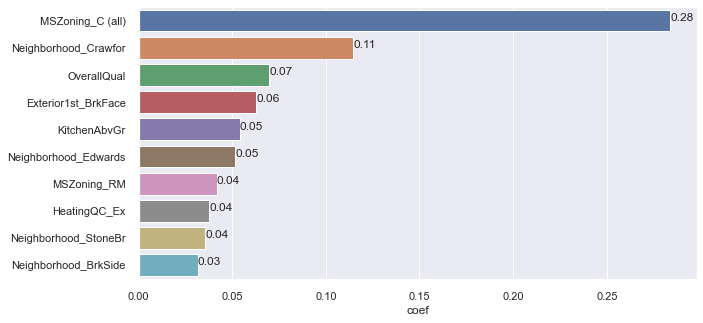

In [291]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_lasso, y = top10_features_lasso.index, x = 'coef')
coef = top10_features_lasso['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()

### XGB 모델 

In [297]:
feature_importance = pd.Series(data = model_xgb.feature_importances_, index = test_x.columns)

top10_features_xgb = pd.DataFrame(feature_importance.sort_values(ascending = False),
                                   columns = ['coef']).head(10)

top10_features_xgb

,coef
GarageFinish_Unf,0.091417
GarageCars,0.091233
TotalBsmtSF,0.075673
BsmtQual_Ex,0.073486
MSZoning_RL,0.067959
Fireplaces,0.062945
BsmtFinType1_GLQ,0.055230
GrLivArea,0.053372
YearRemodAdd,0.051422
OverallQual,0.038533


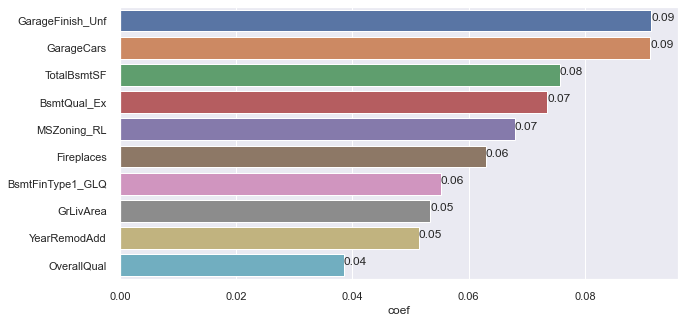

In [303]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_xgb, y = top10_features_xgb.index, x = 'coef')
coef = top10_features_xgb['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()

### CatBoost모델

In [319]:
feature_importance = pd.Series(data = model_cat.feature_importances_, index = test_x.columns)

top10_features_cat = pd.DataFrame(feature_importance.sort_values(ascending = False).head(10), columns = ['coef'])

top10_features_cat

,coef
OverallQual,18.831294
GrLivArea,14.385937
TotalBsmtSF,7.656545
YearBuilt,4.333454
GarageCars,4.316464
LotArea,3.954471
Fireplaces,3.290830
YearRemodAdd,3.250827
BsmtFinSF1,3.236473
GarageArea,3.233815


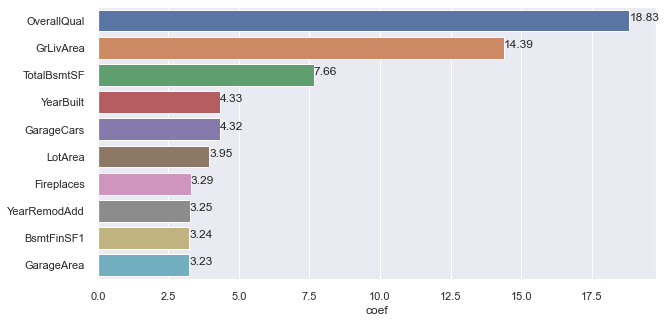

In [335]:
plt.figure(figsize = (10, 5))
sns.barplot(data = top10_features_cat, y = top10_features_cat.index, x = 'coef')
coef = top10_features_cat['coef']

for i in range(coef.shape[0]):
    plt.text(x = coef[i], y = i, s = round(coef[i],2))

plt.show()